In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('C:\\Users\\anush\\Desktop\\Bain Coding Challenge\\train.csv')
sales.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [2]:
sales.shape

(512087, 11)

In [3]:
pd.isna(sales).sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [4]:
## Need to remove NA's from competition matrix first 
sales['Competition_Metric']=sales['Competition_Metric'].fillna(0)
pd.isna(sales).sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
dtype: int64

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
ID                    512087 non-null int64
Day_No                512087 non-null int64
Course_ID             512087 non-null int64
Course_Domain         512087 non-null object
Course_Type           512087 non-null object
Short_Promotion       512087 non-null int64
Public_Holiday        512087 non-null int64
Long_Promotion        512087 non-null int64
User_Traffic          512087 non-null int64
Competition_Metric    512087 non-null float64
Sales                 512087 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


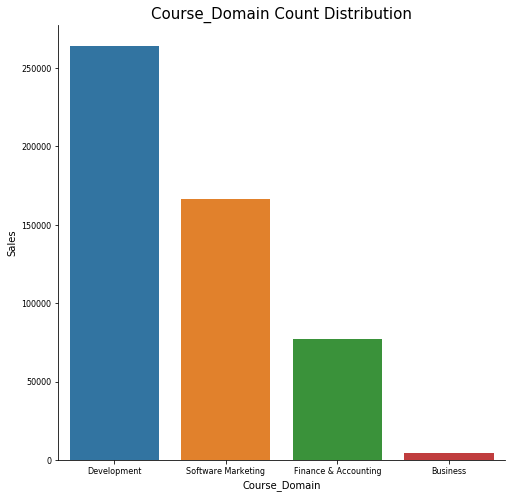

In [6]:
## Exploring Course Domain
# We notice maximum courses in demand are from development and least from business. 
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'Course_Domain', data = sales)
ax.set_xlabel('Course_Domain', fontsize=10)
ax.set_ylabel('Sales', fontsize=10)
ax.set_title('Course_Domain Count Distribution', fontsize=15)
ax.tick_params(labelsize=8)
sns.despine()

In [7]:
sales['Course_Domain'].value_counts()

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64

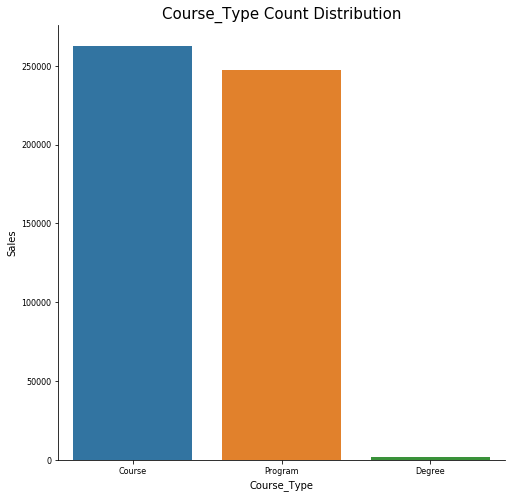

In [8]:
## Exploring Course Type
#Course Type degrees are not in demand which isn't surprising
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'Course_Type', data = sales)
ax.set_xlabel('Course_Type', fontsize=10)
ax.set_ylabel('Sales', fontsize=10)
ax.set_title('Course_Type Count Distribution', fontsize=15)
ax.tick_params(labelsize=8)
sns.despine()

In [9]:
sales["Course_Type"].value_counts()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64

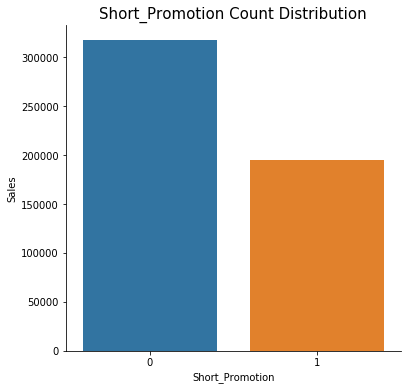

In [10]:
## Exploring short promotion
# Short Promotions slightly affect sales
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(x = 'Short_Promotion', data = sales)
ax.set_xlabel('Short_Promotion', fontsize=10)
ax.set_ylabel('Sales', fontsize=10)
ax.set_title('Short_Promotion Count Distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

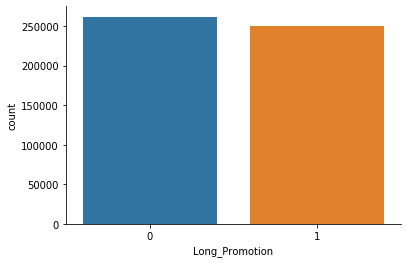

In [11]:
## Exploring short promotion
# Long Promotions don't really affect sales. 
fig.set_size_inches(6, 6)
sns.countplot(x = 'Long_Promotion', data = sales)
ax.set_xlabel('Long_Promotion', fontsize=10)
ax.set_ylabel('Sales', fontsize=10)
ax.set_title('Long_Promotion Count Distribution', fontsize=15)
ax.tick_params(labelsize=8)
sns.despine()

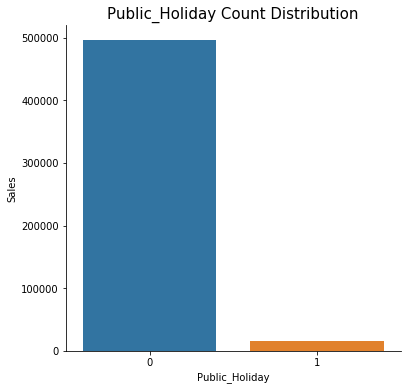

In [12]:
## Exploring Public Holiday
# We would expect more sales during holidays, but it is exact opposite

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(x = 'Public_Holiday', data = sales)
ax.set_xlabel('Public_Holiday', fontsize=10)
ax.set_ylabel('Sales', fontsize=10)
ax.set_title('Public_Holiday Count Distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()


In [13]:
sales.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073092,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100035,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


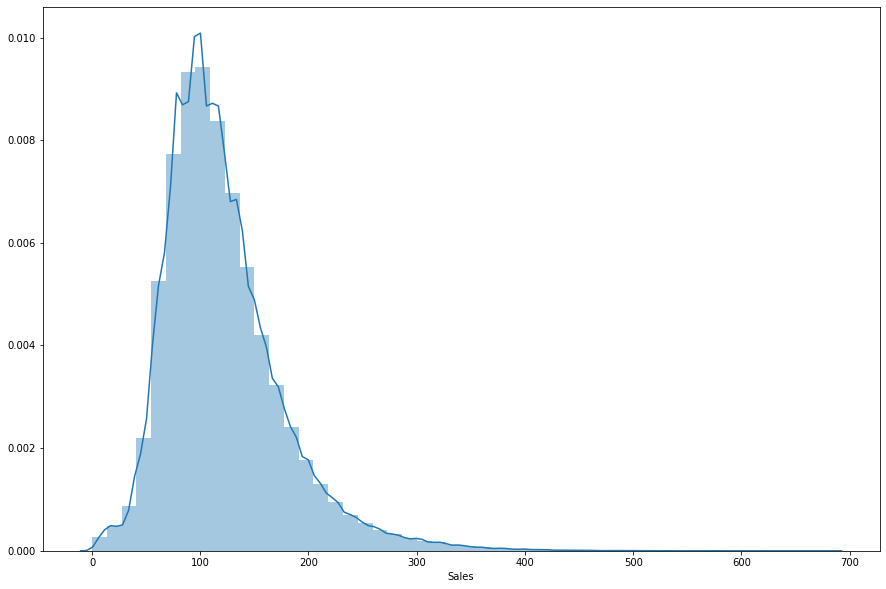

In [14]:
# Sales 
# Mean sales of 120 
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(sales['Sales'])

In [15]:
# Correlation matrix of numerical columns
# We notice user traffic is highly correlated to sales, but since it's not present in test set, I have dropped it
# Dropping ID and Course_ID since both are highly correlated independent variables
corr = sales.corr()
corr.style.background_gradient(cmap="viridis")

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1,0.00105245,0.999996,-5.41577e-06,0.00127445,-0.0395699,0.0336037,-0.00690582,0.0170373
Day_No,0.00105245,1,-0.00050565,0.0146451,0.0191122,-0.0202039,0.0215109,0.00315521,0.0600124
Course_ID,0.999996,-0.00050565,1,-2.69531e-05,0.00124187,-0.0396053,0.0335196,-0.00685905,0.016894
Short_Promotion,-5.41577e-06,0.0146451,-2.69531e-05,1,-0.0187695,-0.00114925,0.198785,0.000178291,0.367762
Public_Holiday,0.00127445,0.0191122,0.00124187,-0.0187695,1,0.00831904,-0.108305,-0.000475349,-0.135052
Long_Promotion,-0.0395699,-0.0202039,-0.0396053,-0.00114925,0.00831904,1,-0.204289,-0.116604,-0.109455
User_Traffic,0.0336037,0.0215109,0.0335196,0.198785,-0.108305,-0.204289,1,-0.147723,0.829741
Competition_Metric,-0.00690582,0.00315521,-0.00685905,0.000178291,-0.000475349,-0.116604,-0.147723,1,-0.0214006
Sales,0.0170373,0.0600124,0.016894,0.367762,-0.135052,-0.109455,0.829741,-0.0214006,1


In [16]:
#One Hot encoding for target variable 'Sales'
sales = pd.get_dummies(data = sales, columns = ['Course_Domain'] , prefix = ['Domain'], drop_first = True)
sales = pd.get_dummies(data = sales, columns = ['Course_Type'] , prefix = ['Type'], drop_first = True)
sales = sales.drop(['User_Traffic','ID','Course_ID'], axis=1)

In [17]:
# All features in int form for modelling
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
Day_No                         512087 non-null int64
Short_Promotion                512087 non-null int64
Public_Holiday                 512087 non-null int64
Long_Promotion                 512087 non-null int64
Competition_Metric             512087 non-null float64
Sales                          512087 non-null int64
Domain_Development             512087 non-null uint8
Domain_Finance & Accounting    512087 non-null uint8
Domain_Software Marketing      512087 non-null uint8
Type_Degree                    512087 non-null uint8
Type_Program                   512087 non-null uint8
dtypes: float64(1), int64(5), uint8(5)
memory usage: 25.9 MB


In [18]:
X = sales.drop(['Sales'],axis=1)
y = sales['Sales']

In [19]:
## Scaling train set
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Xtrain = xgb.DMatrix(np.asmatrix(X_train), label=y_train)
Xtest = xgb.DMatrix(np.asmatrix(X_test), label=y_test)
xgb_dmat = xgb.DMatrix(X_train, y_train)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(102417, 10) (102417,)
(409670, 10) (409670,)


In [20]:
## XGBoost
import xgboost as xgb
#param = {'seed': 1111,
#         'booster':'gbtree',
#         'bst:eta':0.1,
#         'bst:max_depth':7,
#         'subsample':0.6,
#         'colsample_bytree': 0.8,
#         'objective':'reg:linear',
#         'learning_rate':0.7}

param = {'seed': 100,
         'booster':'gbtree',
         'bst:eta':0.1,
         'bst:max_depth':5,
         'subsample':0.6,
         'colsample_bytree': 0.8,
         'lambda':1,
         'objective':'reg:linear',
         'learning_rate':0.7}
          
plst = list(param.items())
num_round = 102

In [21]:
# Train
model = xgb.train(plst, xgb_dmat, num_round)

[12:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
# Predict
y_pred = model.predict(xgb.DMatrix(X_test))
y_pred = y_pred.astype(int)
y_pred[y_pred<0] = 0
y_pred

array([105, 142, 110, ..., 124, 158,  87])

In [23]:
# Calculate metrics

#RMSE
from sklearn import metrics
print('Root Mean Squared Error: %.2f'%np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSLE
from sklearn.metrics import mean_squared_log_error
print('Root Mean Squared Log Error: %.2f'%(mean_squared_log_error(y_test, y_pred)))

Root Mean Squared Error: 29.04
Root Mean Squared Log Error: 0.07


In [24]:
## Test set reading
test = pd.read_csv('C:\\Users\\anush\\Desktop\\Bain Coding Challenge\\test_QkPvNLx.csv')
test1 = test.drop(['ID', 'Course_ID'],axis=1)
test1['Competition_Metric']=test1['Competition_Metric'].fillna(0)
test1 = pd.get_dummies(data = test1, columns = ['Course_Domain'] , prefix = ['Domain'], drop_first = True)
test1 = pd.get_dummies(data = test1, columns = ['Course_Type'] , prefix = ['Type'], drop_first = True)
test1.head()

,Day_No,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Domain_Development,Domain_Finance & Accounting,Domain_Software Marketing,Type_Degree,Type_Program
0,883,1,0,1,0.007,1,0,0,0,0
1,884,1,0,1,0.007,1,0,0,0,0
2,885,1,0,1,0.007,1,0,0,0,0
3,886,1,0,1,0.007,1,0,0,0,0
4,887,0,0,1,0.007,1,0,0,0,0


In [25]:
# Our trained XGBoost model has these feature names
names = model.feature_names
names

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [26]:
# But our test set has different feature names 
test1.columns

Index(['Day_No', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric', 'Domain_Development',
       'Domain_Finance & Accounting', 'Domain_Software Marketing',
       'Type_Degree', 'Type_Program'],
      dtype='object')

In [27]:
# Rename features to test the model
test1.columns=names
test1.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9'], dtype='object')

In [28]:
submission_test_pred = model.predict(xgb.DMatrix(test1))
submission_test_pred = submission_test_pred.astype(int)
submission_test_pred[submission_test_pred<0] = 0
submission_test_pred

array([146, 146, 146, ..., 178, 178, 178])

In [29]:
## Sample Submission file
sample_submission = pd.read_csv('C:\\Users\\anush\\Desktop\\Bain Coding Challenge\\sample_submission.csv')
sample_submission.shape

(36000, 2)

In [30]:
sample_submission['Sales']=submission_test_pred
sample_submission.head()

,ID,Sales
0,883,146
1,884,146
2,885,146
3,886,146
4,887,96


In [31]:
#sample_submission.to_csv('C:\\Users\\anush\\Desktop\\Bain Coding Challenge\\final_submission.csv', index=False)